edges using hue and s/v channels for color based edges detection

https://stackoverflow.com/questions/29156091/opencv-edge-border-detection-based-on-color



In [ ]:
#DRAW EDGES OF THE BOX

import cv2
import numpy as np
from matplotlib import pyplot as plt
debmask=0
debcanny=1
debcycl=0

image=cv2.cvtColor(cv2.imread('../zimages/box/box1.jpg'),cv2.COLOR_BGR2RGB)
img_can=image.copy()
img_nocan=image.copy()

wholelow=(0,0,0)
wholehigh=(135,115,115)
wholemask= cv2.bitwise_not(cv2.inRange(image,wholelow,wholehigh))#killmaskt
wholeimage=cv2.bitwise_and(image,image,mask=wholemask)
if debmask:
    plt.imshow(wholemask)
    plt.show()

# find contours
##
filterparam=(100,20,0)
out_edges=cv2.Canny(cv2.cvtColor(wholeimage, cv2.COLOR_RGB2GRAY),filterparam[0], filterparam[1], filterparam[2])
##morphology operation also here?
#imagedges=mymorph(imagedges,'open',(1,4,1))
##lines from canny are too small and erosion kills also usefull ones
##rectangular kernel (1,3)or(3,1) can be usefull for vertical/horizontaz lines respectively 
if debcanny:
    plt.imshow(out_edges,cmap='gray')
    plt.show()

##w/ canny
cnts_can= cv2.findContours(out_edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cnts_can = cnts_can[0] if len(cnts_can) == 2 else cnts_can[1]
##w/out canny
cnts_nocan= cv2.findContours(wholemask, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cnts_nocan = cnts_nocan[0] if len(cnts_nocan) == 2 else cnts_nocan[1]
##or #cnts=imutils.xyz(cnts) for pickup right one wrt py version

#contours selection
##4 edges contours for canny
out_can = []
out_nocan = []

max_area=cv2.contourArea(max(cnts_can, key=len))

check_shape=1

if check_shape:
    for c in cnts_can:
        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.1 * peri, True)
        #ar = w / float(h)
        if len(approx) == 4:
            if cv2.contourArea(c) >= 0.01*max_area:
                out_can.append(c)
else:
    out_can=cnts_can

##area threshold for contours w/out canny
max_area=cv2.contourArea(max(cnts_nocan, key=len))
for c in cnts_nocan:
    if cv2.contourArea(c) >= 0.01*max_area:
        out_nocan.append(c)
        
##opening/closing for removing noise: better to be done after contours found
##cherrypiching with hough? moments?
## alsoM = cv2.moments(c)
## center = (int(M["m10"] / M["m00"]), int(M["m01"] / M["m00"]))
# contours selection
##improve:dilate before comparison and pick the inner areas

# draw contours
contcolor=(255,0,0)
conthick=10
if debcycl:
    for c in out_can:
        cv2.drawContours(img_can,c, -1, contcolor, conthick) # OR
        #cv2.polylines(image, [box], True, (36,255,12), 3)
    for c in out_nocan:
        cv2.drawContours(img_nocan,c, -1, contcolor, conthick)
else:
    cv2.drawContours(img_nocan,out_nocan, -1, contcolor, -1)
    cv2.drawContours(img_can,out_can, -1, contcolor, conthick)

plt.imshow(img_can)
plt.show()
#img_nocan=mymorph(img_nocan,'erode',(5,5,20))
plt.imshow(img_nocan)    
plt.show()

contours cherrypicking using number of edges is not working properly, every edge of the box is found as an independent contour

### convex hull

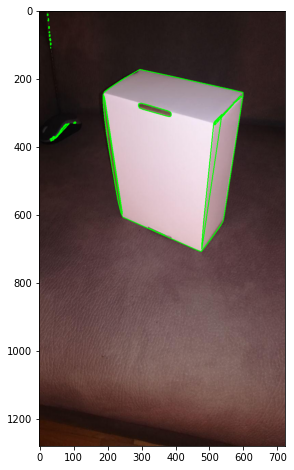

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
debmask=0
debcanny=1
debcycl=0

image=cv2.cvtColor(cv2.imread('../zimages/box/box3.jpg'),cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
edge = cv2.Canny(gray, 140, 210)
contours= cv2.findContours(edge, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
contours = contours[0] if len(contours) == 2 else contours[1]
for c in contours:
    hull = cv2.convexHull(c)
    cv2.drawContours(image, [hull], 0, (0, 255, 0), 2)

plt.subplots(1, figsize=(12,8))
plt.imshow(image)
plt.show()


# bounding rect and rotated rectangle

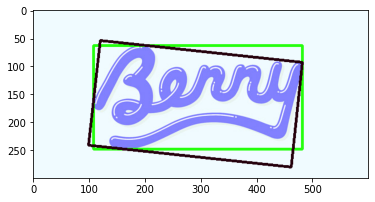

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load image, convert to grayscale, Otsu's threshold for binary image
image = cv2.imread("../zimages/commercial.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Find contours, find rotated rectangle, obtain four verticies, and draw 
cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

x,y,w,h = cv2.boundingRect(cnts[0])
cv2.rectangle(image, (x,y), (x+w,y+h), (36,255,12), 3)

rect = cv2.minAreaRect(cnts[0])
box = np.int0(cv2.boxPoints(rect))
cv2.drawContours(image, [box], 0, (36,0,12), 3) # OR
    #cv2.polylines(image, [box], True, (36,255,12), 3)

# taking biggest contour and minarearect
#max_contour = max(cnts, key=len)
#rect = cv2.minAreaRect(max_contour)


plt.imshow(image)
plt.show()

# rectangular contours

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
test=1
image=cv2.cvtColor(cv2.imread('../zimages/rectangles.jpg'),cv2.COLOR_BGR2RGB)
imageout=image.copy()
filterparam=(100,20,0)
imagedges=cv2.Canny(cv2.cvtColor(image,cv2.COLOR_BGR2GRAY),filterparam[0], filterparam[1], filterparam[2])
cnts= cv2.findContours(imagedges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
contours=cv2.findContours(imagedges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
contours = contours[0] if len(contours) == 2 else contours[1]
#print(cnts)
#print(contours)
rect_cnts = []
rect_contours=[]
max_cnt = max(cnts, key=len)
max_contour=max(contours,key=len)
max_area_cnts=cv2.contourArea(max_cnt)
max_area_contours=cv2.contourArea(max_contour)
if test:
    periratio=0.1
    arearatio=0.3
    for cnt in contours:
        peri = cv2.arcLength(cnt, True)
        approx = cv2.approxPolyDP(cnt,periratio* peri, True)
        if len(approx) == 4 and cv2.contourArea(cnt) >= arearatio*max_area_cnts:
            rect_cnts.append(cnt)
    for cnt in cnts:
        peri = cv2.arcLength(cnt, True)
        approx = cv2.approxPolyDP(cnt, periratio * peri, True)
        if len(approx) == 4 and cv2.contourArea(cnt)>=arearatio*max_area_contours:
            rect_contours.append(cnt)
else:
    rect_cnts=cnts
    rect_contours=contours
#print(len(rect_cnts))    
#print(len(rect_contours))
contcolor=(0,0,0)
cv2.drawContours(image,rect_cnts, -1, contcolor, 5)
cv2.drawContours(imageout,rect_contours, -1, contcolor, 5)
plt.imshow(image)
plt.show()
plt.imshow(imageout)
plt.show()

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
test=1
image=cv2.cvtColor(cv2.imread('../zimages/perspective-card.jpeg'),cv2.COLOR_BGR2RGB)
imageout=image.copy()
filterparam=(100,20,0)
imagedges=cv2.Canny(cv2.cvtColor(image,cv2.COLOR_BGR2GRAY),filterparam[0], filterparam[1], filterparam[2])
cnts= cv2.findContours(imagedges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
contours=cv2.findContours(imagedges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
contours = contours[0] if len(contours) == 2 else contours[1]
#print(cnts)
#print(contours)
rect_cnts = []
rect_contours=[]
max_cnt = max(cnts, key=len)
max_contour=max(contours,key=len)
max_area_cnts=cv2.contourArea(max_cnt)
max_area_contours=cv2.contourArea(max_contour)
if test:
    periratio=0.1
    arearatio=0.3
    for cnt in contours:
        peri = cv2.arcLength(cnt, True)
        approx = cv2.approxPolyDP(cnt,periratio* peri, True)
        if cv2.isContourConvex(cnt) and cv2.contourArea(cnt) >= arearatio*max_area_cnts:
            rect_cnts.append(cnt)
    for cnt in cnts:
        peri = cv2.arcLength(cnt, True)
        approx = cv2.approxPolyDP(cnt, periratio * peri, True)
        if cv2.isContourConvex(cnt) and cv2.contourArea(cnt) >= arearatio*max_area_cnts:
            rect_contours.append(cnt)
else:
    rect_cnts=cnts
    rect_contours=contours
#print(len(rect_cnts))    
#print(len(rect_contours))
contcolor=(255,0,0)
cv2.drawContours(image,rect_cnts, -1, contcolor, 5)
cv2.drawContours(imageout,rect_contours, -1, contcolor, 5)
plt.imshow(image)
plt.show()
plt.imshow(imageout)
plt.show()

## watershed algorithm

https://docs.opencv.org/4.2.0/d2/dbd/tutorial_distance_transform.html

In [ ]:
import cv2
import numpy as np
import random as rng
rng.seed(12345)
from matplotlib import pyplot as plt
debug=1
src=cv2.imread('../zimages/cards/cards.jpeg')
## back-foreground already separed

# laplacian filter
kernel = np.array([[1, 1, 1], [1, -8, 1], [1, 1, 1]], dtype=np.float32)
imgLaplacian = cv2.filter2D(src, cv2.CV_32F, kernel)
imgResult = np.float32(src) - imgLaplacian
# convert back to 8bits gray scale
imgResult = np.clip(imgResult, 0, 255)
imgResult = imgResult.astype('uint8')
imgLaplacian = np.clip(imgLaplacian, 0, 255)
imgLaplacian = np.uint8(imgLaplacian)
if debug:
    plt.imshow(imgResult,cmap='gray')
    plt.show()
bw = cv2.cvtColor(imgResult, cv2.COLOR_BGR2GRAY)
_, bw = cv2.threshold(bw, 40, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
if debug:
    plt.imshow(bw,cmap='gray')
    plt.show()
dist = cv2.distanceTransform(bw, cv2.DIST_L2, 3)
# Normalize the distance image for range = {0.0, 1.0}
# so we can visualize and threshold it
cv2.normalize(dist, dist, 0, 1.0, cv2.NORM_MINMAX)
if debug:
    plt.imshow(dist,cmap='gray')
    plt.show()
_, dist = cv2.threshold(dist, 0.4, 1.0, cv2.THRESH_BINARY)

# Dilate a bit the dist image
kernel1 = np.ones((3,3), dtype=np.uint8)
dist = cv2.dilate(dist, kernel1)
if debug:
    plt.imshow(dist,cmap='gray')
    plt.show()
dist_8u = dist.astype('uint8')

# Find total markers
contours= cv2.findContours(dist_8u, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]

# Create the marker image for the watershed algorithm
markers = np.zeros(dist.shape, dtype=np.int32)

# Draw the foreground markers
for i in range(len(contours)):
    cv2.drawContours(markers, contours, i, (i+1), -1)##not working
#cv2.drawContours(markers, contours, -1,(255,0,0), -1)   
# Draw the background marker
cv2.circle(markers, (5,5), 3, (255,255,255), -1)
if debug:
    plt.imshow(markers,cmap='gray')
    plt.show()
    

cv2.watershed(imgResult, markers)
#mark = np.zeros(markers.shape, dtype=np.uint8)
mark = markers.astype('uint8')
mark = cv2.bitwise_not(mark)
if debug:
    plt.imshow(mark,cmap='gray')
    plt.show()

# Generate random colors
colors = []
for contour in contours:
    colors.append((rng.randint(0,256), rng.randint(0,256), rng.randint(0,256)))
# Create the result image
dst = np.zeros((markers.shape[0], markers.shape[1], 3), dtype=np.uint8)

# Fill labeled objects with random colors
for i in range(markers.shape[0]):
    for j in range(markers.shape[1]):
        index = markers[i,j]
        if index > 0 and index <= len(contours):
            dst[i,j,:] = colors[index-1]
            
# Visualize the final image
plt.imshow(dst)
plt.show()

### hough lines detector

https://legacy.imagemagick.org/discourse-server/viewtopic.php?f=1&t=14491&start=9

https://legacy.imagemagick.org/discourse-server/viewtopic.php?f=2&t=14532&p=50617#p50617

https://stackoverflow.com/questions/10260519/hough-transformation-vs-contour-detection-for-rectangle-recognition-with-perspec




In [71]:
#HOUGH lines detection
import cv2
import numpy as np
from matplotlib import pyplot as plt
debug=0
method=0

img = cv2.imread('../zimages/rectangle-persp.jpeg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,5,150,apertureSize = 3)
if debug:
    plt.imshow(edges)
    plt.show()
    
if method==1:
    minLineLength = 1000
    maxLineGap = 100
    lines = cv2.HoughLinesP(edges,1,np.pi/180,100)#,minLineLength,maxLineGap)
    for x1,y1,x2,y2 in lines[0]:
        cv2.line(img,(x1,y1),(x2,y2),(255,0,0),10)
elif method==0:
    lines = cv2.HoughLinesP(edges,1,np.pi/180,100)
    for rho,theta in lines:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))
        cv2.line(img,(x1,y1),(x2,y2),(255,0,),10)
    
plt.imshow(img)
plt.show()

ValueError: not enough values to unpack (expected 2, got 1)

 you can also use other line detection class such as opencv LSD, Split and Merge. To use hough with high level of robustness, you have to write quite a few routing to detect multiple small line with small angle difference and merge them (either by iterating through houghline with multiple paramters, or merge them from outside
 

http://www.robindavid.fr/opencv-tutorial/chapter5-line-edge-and-contours-detection.html



https://github.com/RobinDavid/OpenCV-tutorials/tree/master/officialsamples